[ 0.          0.10083842  0.20064886  0.2984138   0.39313661  0.48385164
  0.56963411  0.64960951  0.72296256  0.78894546  0.84688556  0.8961922
  0.93636273  0.96698762  0.98775469  0.99845223  0.99897117  0.98930624
  0.96955595  0.93992165  0.90070545  0.85230712  0.79522006  0.73002623
  0.65739025  0.57805259  0.49282204  0.40256749  0.30820902  0.21070855
  0.11106004  0.01027934 -0.09060615 -0.19056796 -0.28858706 -0.38366419
 -0.47483011 -0.56115544 -0.64176014 -0.7158225  -0.7825875  -0.84137452
 -0.89158426 -0.93270486 -0.96431712 -0.98609877 -0.99782778 -0.99938456
 -0.99075324 -0.97202182 -0.94338126 -0.90512352 -0.85763861 -0.80141062
 -0.73701276 -0.66510151 -0.58640998 -0.50174037 -0.41195583 -0.31797166
 -0.22074597 -0.12126992 -0.0205576   0.0803643   0.18046693  0.27872982
  0.37415123  0.46575841  0.55261747  0.63384295  0.7086068   0.77614685
  0.83577457  0.8868821   0.92894843  0.96154471  0.98433866  0.99709789
  0.99969234  0.99209556  0.97438499  0.94674118  0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4275
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2135
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0807 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0274 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0150
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042  
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4413e-04
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3359e-04 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6477e-04 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4728e-04
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1621e-04
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1245e-05
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2014e-05 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.66

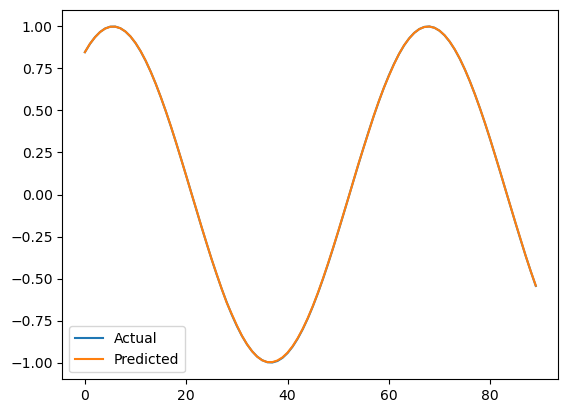

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Generate a simple sequential dataset
def generate_sequence(length):
    return np.sin(np.linspace(0, 10, length))

sequence_length = 100
data = generate_sequence(sequence_length)
print(data)
# Prepare input and output sequences
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data, time_step)
print(X)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

# Train the model
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Generate a new sequence for prediction
test_data = generate_sequence(sequence_length)

# Prepare test dataset
X_test, y_test = create_dataset(test_data, time_step)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Compare predictions with actual values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

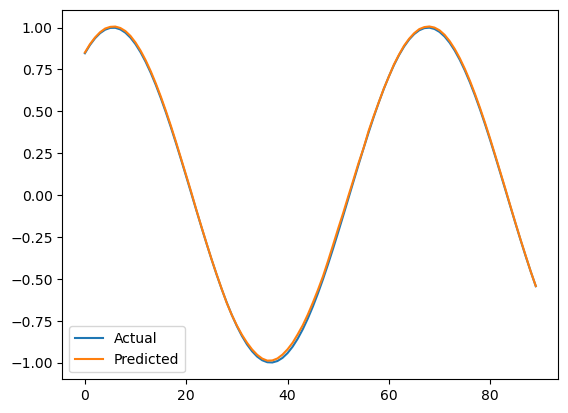

In [9]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()